In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### 1. Gunakan data 'Mall_Customers.csv'

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [3]:
X = df.iloc[:, 3:]
y = df.iloc[:, 1]

print(X.head(), "\n")
print(y.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40 

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object


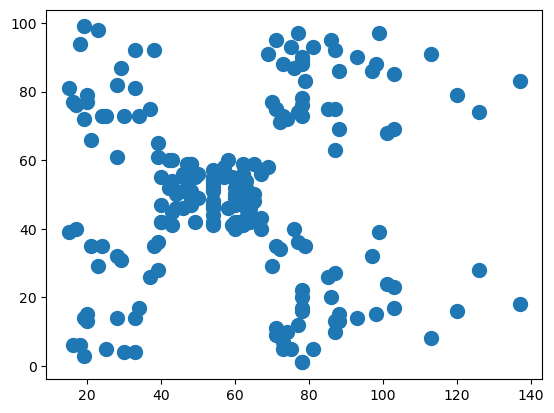

In [4]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

### 3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

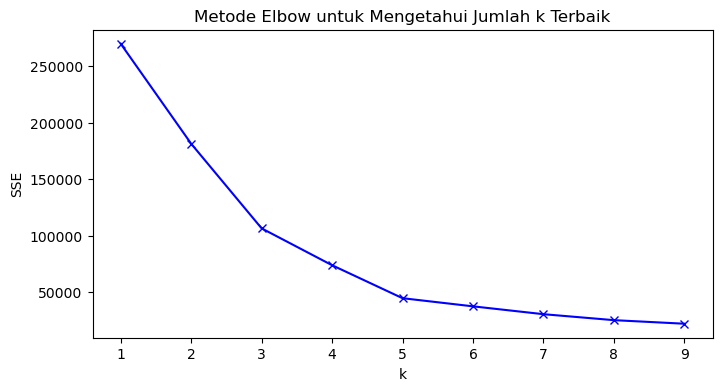

In [5]:
# membuat list nilai sse
sse = []

# membuat range jumlah kluster dari 1-10
K = range(1,10)

# melakukan pengecekan nilai sse untuk tiap jumlah kluster
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# membuat plot dari hasil perhitungan sse dari tiap jumlah kluster
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [6]:
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')
    selisih = sse[idx-2]-sse_val
    print(f'Perubahan dari sebelumnya : {selisih}\n')

k=1; SSE=269981.28
Perubahan dari sebelumnya : -248154.34369676837

k=2; SSE=181363.595959596
Perubahan dari sebelumnya : 88617.68404040404

k=3; SSE=106348.37306211119
Perubahan dari sebelumnya : 75015.2228974848

k=4; SSE=73679.78903948837
Perubahan dari sebelumnya : 32668.584022622817

k=5; SSE=44448.45544793371
Perubahan dari sebelumnya : 29231.333591554663

k=6; SSE=37233.81451071001
Perubahan dari sebelumnya : 7214.640937223696

k=7; SSE=30273.39431207004
Perubahan dari sebelumnya : 6960.420198639975

k=8; SSE=24990.434310396904
Perubahan dari sebelumnya : 5282.960001673135

k=9; SSE=21826.93630323165
Perubahan dari sebelumnya : 3163.4980071652535



<br>
Pada hasil perhitungan Elbow Method, didapatkan hasil nilai SSE dari 9 jenis jumlah cluster yang berbeda. Menurut teori dari Elbow Method, jumlah cluster yang optimal adalah jumlah cluster yang memiliki nilai SSE yang mengalami penurunan tertinggi dari nilai SSE jumlah kluster sebelumnya. Dari hasil perhitungan yang didapatkan, 2 cluster memiliki nilai penurunan SSE yang lebih tinggi dibandingkan jumlah cluster lainnya, jadi <b>proses cluster Kmeans akan menggunakan 2 cluster</b>
<br>

In [7]:
from sklearn.cluster import KMeans

# instansiasi model dengan mengganggap data memiliki 2 cluster
cl_kmeans = KMeans(n_clusters=2)

# melakukan trianing sekaligus prediksi data
y_kmeans = cl_kmeans.fit_predict(X)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


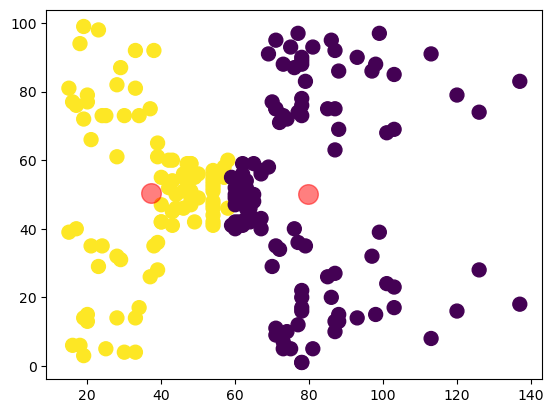

In [8]:
# membuat plot dari hasil clustering
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# membuat plot dari pusat cluster
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### 4. Buat implementasi model SOM untuk segmentasi citra lain (sailboat.tiff)

In [9]:
from skimage import io

# membuat fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# membuat fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# membuat fungsi untuk menemukan indeks unit pemenang
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# membuat fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)
    
# membuat fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    # Ukuran SOM sesuai dengan jumlah saluran warna
    som_shape = (10, 10, input_shape[2])
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * \
            np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [13]:
sailboat_path = "data/sailboat.tiff"
sailboat = io.imread(sailboat_path) / 255.0

In [14]:
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(sailboat, num_epochs, initial_learning_rate, initial_neighborhood_radius)

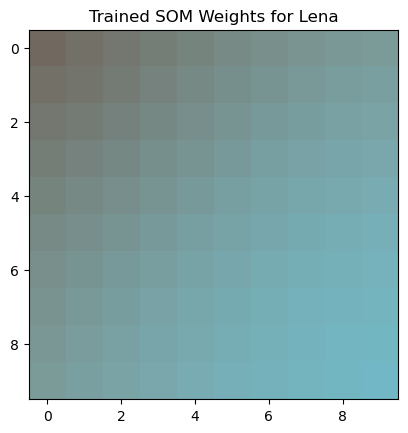

In [15]:
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()